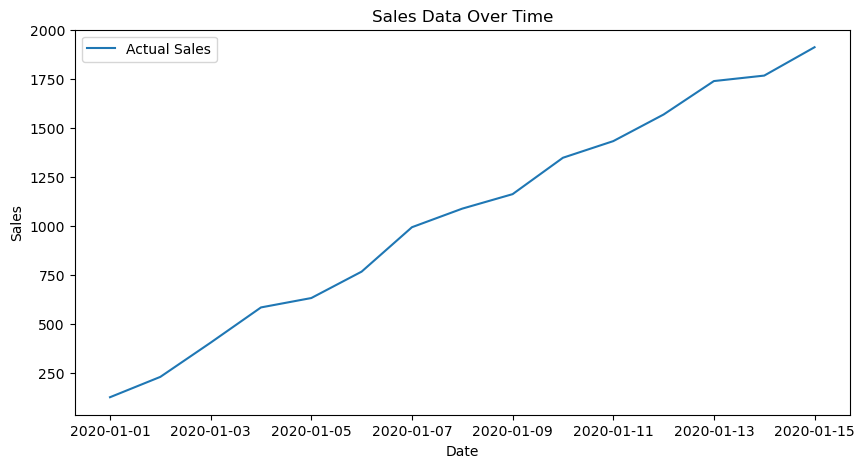

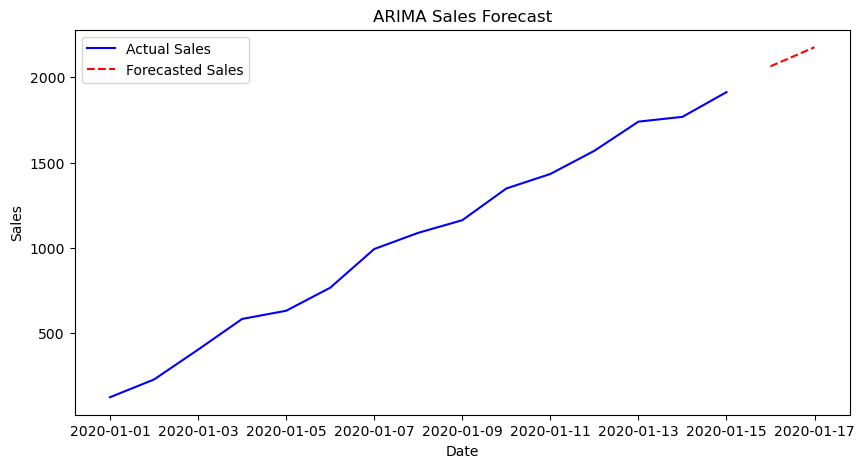

            Predicted Sales
Date                       
2020-01-16      2064.589356
2020-01-17      2176.313028


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings

warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("sales_data.csv", parse_dates=["date"], index_col="date")

# Visualize data
plt.figure(figsize=(10, 5))
plt.plot(df, label="Actual Sales")
plt.title("Sales Data Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

# Train ARIMA model (p, d, q) parameters
p, d, q = 2, 1, 2  # You can tune these values
model = ARIMA(df, order=(p, d, q))
model_fit = model.fit()


forecast_steps = 2
forecast = model_fit.forecast(steps=forecast_steps)

# Create future date index
future_dates = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq="D")[1:]

# Create a DataFrame for forecasted values
forecast_df = pd.DataFrame({"Date": future_dates, "Predicted Sales": forecast.values})
forecast_df.set_index("Date", inplace=True)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(df, label="Actual Sales", color="blue")
plt.plot(forecast_df, label="Forecasted Sales", color="red", linestyle="dashed")
plt.title("ARIMA Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

# Print forecasted values
print(forecast_df)
